In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('./social_data.xlsx')

In [3]:
df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text


### Data Pre-Processing to make it ready for analysis in Tableau

In [4]:
df['Engagement_Rate']=0

In [5]:
new_df=df[df['Total Impressions']!=0]

In [6]:
new_df['Engagement_Rate']=(np.array(new_df['Total Engagements'])/np.array(new_df['Total Impressions']))*100
new_df

<ipython-input-6-7917992a1052>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Engagement_Rate']=(np.array(new_df['Total Engagements'])/np.array(new_df['Total Impressions']))*100


,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement_Rate
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo,4.410202
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video,17.192041
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video,10.429581
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo,21.341399
...,...,...,...,...,...,...,...,...
3463,2023-01-04 13:17:28.473,General,TWITTER,N/A,393,18,Text,4.580153
3464,2023-01-04 13:00:02.187,General,TWITTER,Community Engagement,136660,2371,Photo,1.734963
3465,2023-01-04 13:00:01.000,General,FBPAGE,Community Engagement,29051,811,Photo,2.791642
3470,2023-01-03 13:34:33.887,General,TWITTER,N/A,7704,153,Text,1.985981


In [7]:
new_df=new_df[new_df['Engagement_Rate']<=new_df['Engagement_Rate'].quantile(0.98)]

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2680 entries, 4 to 3477
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published Date     2680 non-null   datetime64[ns]
 1   Account            2680 non-null   object        
 2   Account Type       2680 non-null   object        
 3   Campaign Name      2680 non-null   object        
 4   Total Impressions  2680 non-null   int64         
 5   Total Engagements  2680 non-null   int64         
 6   Media Type         2680 non-null   object        
 7   Engagement_Rate    2680 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 188.4+ KB


<AxesSubplot:>

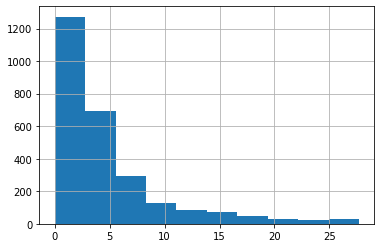

In [9]:
new_df['Engagement_Rate'].hist()

<AxesSubplot:ylabel='Engagement_Rate'>

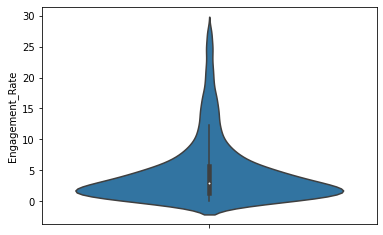

In [10]:
sns.violinplot(y=new_df['Engagement_Rate'])

In [11]:
df_final=new_df
df_final['Date']=new_df['Published Date'].dt.day
df_final['Month']=new_df['Published Date'].dt.month
df_final['Year']=new_df['Published Date'].dt.year
df_final['Hour']=new_df['Published Date'].dt.hour

<ipython-input-11-5842955f739d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Date']=new_df['Published Date'].dt.day
<ipython-input-11-5842955f739d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Month']=new_df['Published Date'].dt.month
<ipython-input-11-5842955f739d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [12]:
df_final

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement_Rate,Date,Month,Year,Hour
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628,31,3,2023,19
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo,4.410202,31,3,2023,19
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video,17.192041,31,3,2023,19
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video,10.429581,31,3,2023,18
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo,21.341399,31,3,2023,18
...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2023-01-04 13:17:28.473,General,TWITTER,N/A,393,18,Text,4.580153,4,1,2023,13
3464,2023-01-04 13:00:02.187,General,TWITTER,Community Engagement,136660,2371,Photo,1.734963,4,1,2023,13
3465,2023-01-04 13:00:01.000,General,FBPAGE,Community Engagement,29051,811,Photo,2.791642,4,1,2023,13
3470,2023-01-03 13:34:33.887,General,TWITTER,N/A,7704,153,Text,1.985981,3,1,2023,13


## Grouping the data by date

In [13]:
date_wise=df_final.groupby(['Date','Month','Year']).sum(['Total Impressions','Total Engagements']).loc[:,['Total Impressions','Total Engagements']]

In [14]:
date_wise

Total Impressions  Total Engagements
Date Month Year                                      
1    2     2023             247170               4346
     3     2023             375450              32779
2    2     2023             305970               9250
     3     2023             264245              12660
3    1     2023               9820                195
...                            ...                ...
29   3     2023             716945              38502
30   1     2023              95784               4933
     3     2023             725855              65810
31   1     2023              17412                821
     3     2023             482494              40122

[87 rows x 2 columns]

In [31]:
date_wise.to_csv('./date_wise.csv')

## Grouping the data by Hour of posting

In [15]:
hour_wise=df_final.groupby(['Hour']).sum(['Total Impressions','Total Engagements']).loc[:,['Total Impressions','Total Engagements']]
hour_wise['EngagementRate']=(hour_wise['Total Engagements']/hour_wise['Total Impressions'])*100

In [16]:
hour_wise

,Total Impressions,Total Engagements,EngagementRate
Hour,,,
2,32613,274,0.840156
3,66113,5114,7.735241
4,46270,4135,8.936676
5,227435,25154,11.059863
6,724597,58445,8.065863
7,916505,80822,8.818501
8,1865980,187699,10.059004
9,4932755,351271,7.121193
10,4076706,235940,5.787516


In [83]:
hour_wise.to_csv('./hour_wise.csv')

## Mean Engagement Rate

In [17]:
df_final['Engagement_Rate'].mean()

4.694684729411957

## Grouping the data by Media Type

In [18]:
mType=pd.DataFrame(np.array(df_final.groupby('Media Type').count()).T[0],index=df_final.groupby('Media Type').count().index,columns=['Count'])

In [19]:
df_final.groupby('Media Type').mean('Engagement_Rate')['Engagement_Rate']

Media Type
Carousel     3.784294
Link         2.343732
Mixed       10.770357
Photo        4.890064
Text         3.979139
Video        4.954312
Name: Engagement_Rate, dtype: float64

In [20]:
mType

,Count
Media Type,
Carousel,9
Link,40
Mixed,5
Photo,1206
Text,546
Video,874


In [21]:
mType['Engagement_Rate']=df_final.groupby('Media Type').mean('Engagement_Rate')['Engagement_Rate']

In [22]:
mType

,Count,Engagement_Rate
Media Type,,
Carousel,9,3.784294
Link,40,2.343732
Mixed,5,10.770357
Photo,1206,4.890064
Text,546,3.979139
Video,874,4.954312


In [51]:
mType.to_csv('./Media.csv')

## Typical Engagement Rate untill March 2023 is ~ 4.69%

#### For Calculating the likelihood of attaining 15% engagement rate, we must know the number of times this target rate has been acheieved

In [23]:
favourable_outcomes=len(df_final[df_final['Engagement_Rate']>=15])

#### So, In total the 15% benchmark has been crossed 171 times in the entire dataset. Hence, the likelihood is calculated as follows

In [24]:
total_outcomes=len(df_final)

In [25]:
likelihood=(favourable_outcomes/total_outcomes)*100

In [26]:
likelihood

6.380597014925374